In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('drive/My Drive/FML/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X=data.iloc[:,[2]].values
X

array([[19],
       [35],
       [26],
       [27],
       [19],
       [27],
       [27],
       [32],
       [25],
       [35],
       [26],
       [26],
       [20],
       [32],
       [18],
       [29],
       [47],
       [45],
       [46],
       [48],
       [45],
       [47],
       [48],
       [45],
       [46],
       [47],
       [49],
       [47],
       [29],
       [31],
       [31],
       [27],
       [21],
       [28],
       [27],
       [35],
       [33],
       [30],
       [26],
       [27],
       [27],
       [33],
       [35],
       [30],
       [28],
       [23],
       [25],
       [27],
       [30],
       [31],
       [24],
       [18],
       [29],
       [35],
       [27],
       [24],
       [23],
       [28],
       [22],
       [32],
       [27],
       [25],
       [23],
       [32],
       [59],
       [24],
       [24],
       [23],
       [22],
       [31],
       [25],
       [24],
       [20],
       [33],
       [32],
       [34],
       [18],

In [ ]:
Y=data.iloc[:,[3]].values
Y

array([[ 19000],
       [ 20000],
       [ 43000],
       [ 57000],
       [ 76000],
       [ 58000],
       [ 84000],
       [150000],
       [ 33000],
       [ 65000],
       [ 80000],
       [ 52000],
       [ 86000],
       [ 18000],
       [ 82000],
       [ 80000],
       [ 25000],
       [ 26000],
       [ 28000],
       [ 29000],
       [ 22000],
       [ 49000],
       [ 41000],
       [ 22000],
       [ 23000],
       [ 20000],
       [ 28000],
       [ 30000],
       [ 43000],
       [ 18000],
       [ 74000],
       [137000],
       [ 16000],
       [ 44000],
       [ 90000],
       [ 27000],
       [ 28000],
       [ 49000],
       [ 72000],
       [ 31000],
       [ 17000],
       [ 51000],
       [108000],
       [ 15000],
       [ 84000],
       [ 20000],
       [ 79000],
       [ 54000],
       [135000],
       [ 89000],
       [ 32000],
       [ 44000],
       [ 83000],
       [ 23000],
       [ 58000],
       [ 55000],
       [ 48000],
       [ 79000],
       [ 18000

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[['Age','EstimatedSalary']] = imputer.fit_transform(data[['Age','EstimatedSalary']])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3.0,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler #when numbers are in two  different levels-we use Standard Scaler to normalize data here age and salary
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=regressor.predict(X_test)
Y_pred

array([[65236.10770447],
       [69434.34720345],
       [67860.00739133],
       [65236.10770447],
       [67860.00739133],
       [63661.76789236],
       [65760.88764185],
       [68384.7873287 ],
       [58938.74845601],
       [74157.36663979],
       [65236.10770447],
       [64186.54782973],
       [68909.56726608],
       [69959.12714082],
       [59988.30833076],
       [66285.66757922],
       [68909.56726608],
       [59463.52839339],
       [78355.60613877],
       [67860.00739133],
       [67860.00739133],
       [74157.36663979],
       [71008.68701556],
       [74157.36663979],
       [61562.64814287],
       [75206.92651454],
       [64186.54782973],
       [64711.3277671 ],
       [68909.56726608],
       [66285.66757922],
       [60513.08826813],
       [68909.56726608],
       [79405.16601351],
       [68909.56726608],
       [62087.42808024],
       [58938.74845601],
       [61037.8682055 ],
       [67335.22745396],
       [65760.88764185],
       [75206.92651454],


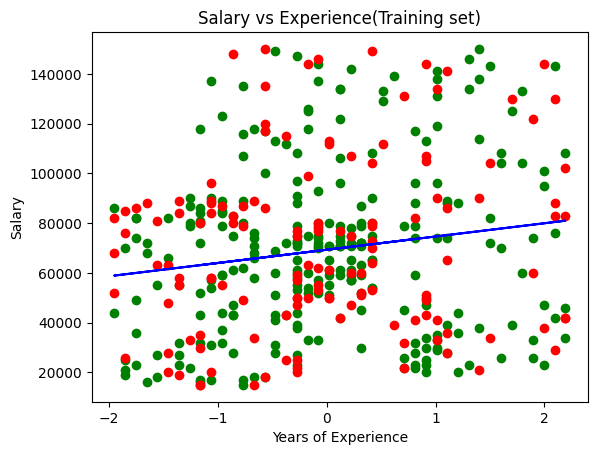

In [ ]:
plt.scatter(X_train,Y_train,color='green')
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

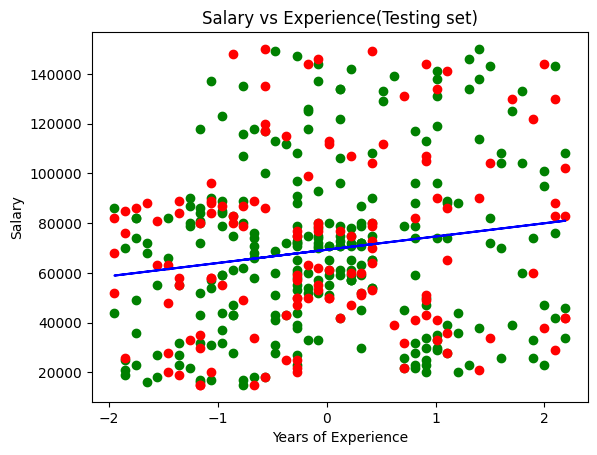

In [ ]:
plt.scatter(X_train,Y_train,color='green')
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.title('Salary vs Experience(Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
salary=pd.read_csv('drive/My Drive/FML/Salary_Data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x=salary.iloc[:,0].values

In [5]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
y=salary.iloc[:,1].values

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [9]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=regressor.predict(x_test)

In [12]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

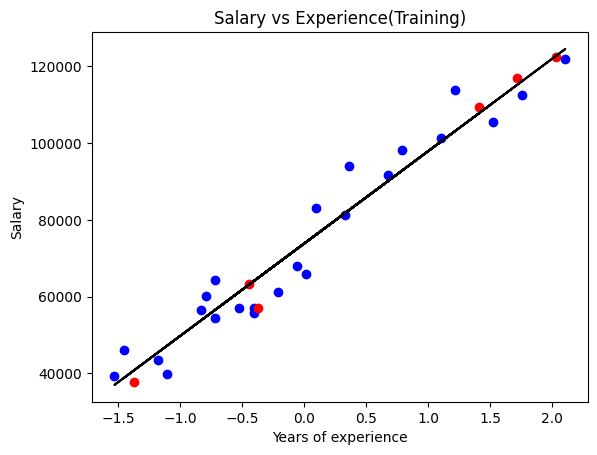

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='black')
plt.title('Salary vs Experience(Training)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

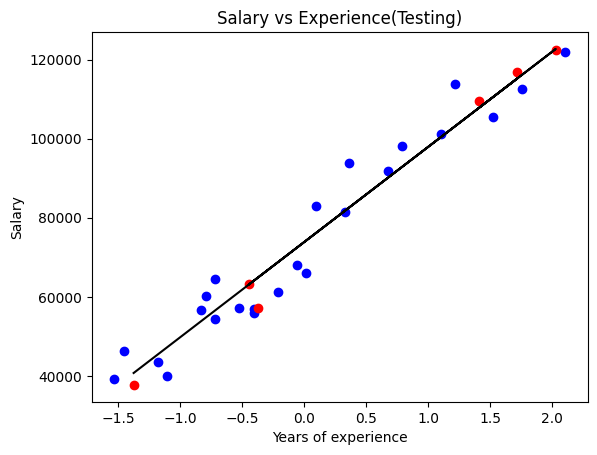

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='black')
plt.title('Salary vs Experience(Testing)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()